In [20]:
import pandas as pd #Pandas kütüphanesini verileri okumak,kullanmak ve analiz etmek için kullandık.
import numpy as np #Numpy kütüphanesini elimizdeki sayısal verileri kullanmak ve bu sayılarla çalışmak için ekledik.
import matplotlib.pyplot as plt #Bu kütüphaneyi verilerimizi görselleştirmek için kullandık.
import seaborn as sns #Seaborn Matplotlib kütüphanesinin görsellerini işlemek ve daha güzel hale getirmek için kullandığımız kütüphanedir.

# Google Drive'dan dosyayı yükleme
file_path = '/content/drive/MyDrive/Colab Notebooks/Python_odev/natural_disasters_2024 (1).csv'

# CSV dosyasını olası hata durumu olunca yakalamak için try-except bloğu ile yakalıyoruz.
try:
    # Dosyayı pandas ile okuyoruz
    data = pd.read_csv(file_path)
    print("Dosya başarıyla yüklendi!")
    print(data.head())  # Veri setinin ilk 5 satırını head() metodu ile yazdırıyoruz.
except FileNotFoundError:
    print("Hata: Dosya yolu bulunamadı. Lütfen yolu ve dosya adını kontrol edin.")
    exit()  # Eğer dosya bulunamazsa programı sonlandırıyoruz

# Veri İncelemesi Sorgularını yapıyoruz.
print("Veri setinin ilk 5 satırı:")
print(data.head())  # İlk 5 satırı yazdırıyoruz  !!Sorgu  ata.head() fonksiyonu, veri setinin ilk 5 satırını gösterir. Bu, veri setinin yapısını hızlıca görmek için kullanılır. İlk 5 satır, veri setindeki sütun isimlerini ve her bir sütunun örnek değerlerini görmemizi sağlar.
print("\nVeri setinin genel bilgileri:")
data.info()  # Veri setinin yapısını ve her sütunun tipini yazdırıyoruz  !!Sorgu data.info() fonksiyonu, veri setinin genel yapısı hakkında bilgi verir.
print("\nEksik değerlerin sayısı:")
print(data.isnull().sum())  # Eksik değerlerin sayısını kontrol ediyoruz  !!Sorgu

# Eksik verileri dolduruyoruz (varsayılan olarak '**' ile)
data.fillna("**", inplace=True)



Dosya başarıyla yüklendi!
   Disaster_ID Disaster_Type   Location  Magnitude                 Date  \
0            1      Wildfire     Brazil   6.267393  2024-01-01 00:00:00   
1            2     Hurricane  Indonesia   6.649358  2024-01-01 01:00:00   
2            3       Tornado      China   9.724366  2024-01-01 02:00:00   
3            4         Flood      India   1.702505  2024-01-01 03:00:00   
4            5         Flood     Brazil   7.917748  2024-01-01 04:00:00   

   Fatalities  Economic_Loss($)  
0        9706      6.509790e+08  
1        2233      5.538357e+08  
2         478      6.910998e+07  
3        2867      8.474880e+08  
4         776      6.449297e+08  
Veri setinin ilk 5 satırı:
   Disaster_ID Disaster_Type   Location  Magnitude                 Date  \
0            1      Wildfire     Brazil   6.267393  2024-01-01 00:00:00   
1            2     Hurricane  Indonesia   6.649358  2024-01-01 01:00:00   
2            3       Tornado      China   9.724366  2024-01-01 02:0


En sık görülen afet türleri (Yatay Çubuk Grafiği):


<ipython-input-7-0318e32c679e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_counts.values, y=disaster_counts.index, palette="viridis", orient='h')  # Yatay çubuk grafiği çiziyoruz


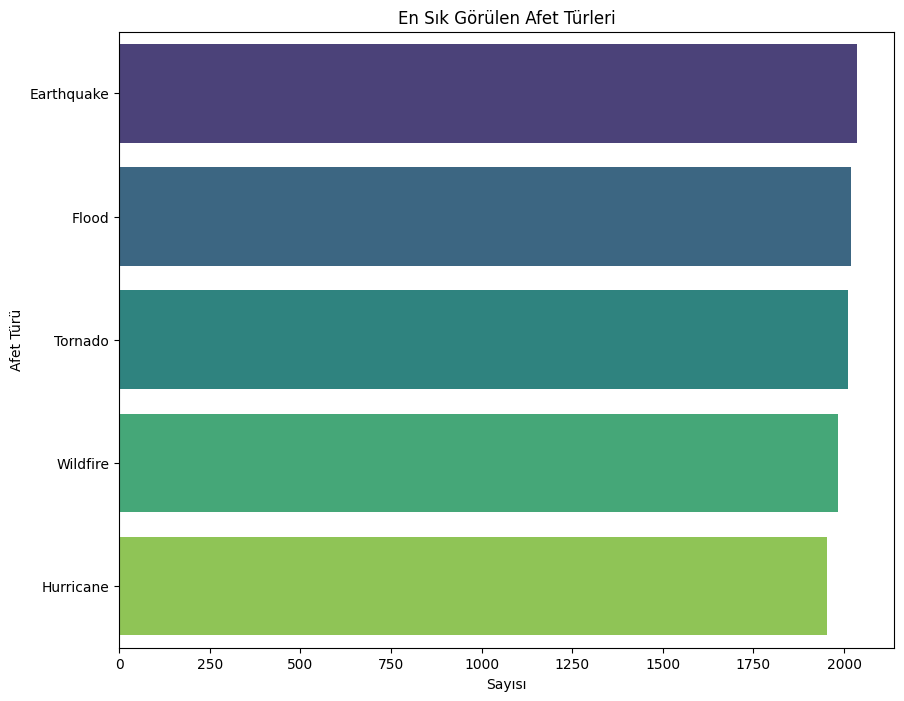

In [7]:
# 1. En Sık Görülen Afet Türleri (Yatay Çubuk Grafiği)
print("\nEn sık görülen afet türleri (Yatay Çubuk Grafiği):")
disaster_counts = data["Disaster_Type"].value_counts()  # Afet türlerinin sıklığını hesaplıyoruz  !!Sorgu
plt.figure(figsize=(10, 8))  # Grafiğin boyutunu ayarlıyoruz
sns.barplot(x=disaster_counts.values, y=disaster_counts.index, palette="viridis", orient='h')  # Yatay çubuk grafiği çiziyoruz
plt.title("En Sık Görülen Afet Türleri")
plt.xlabel("Sayısı")
plt.ylabel("Afet Türü")
plt.show()
# Açıklama: Bu grafik, her afet türünün ne kadar sık meydana geldiğini gösteren yatay bir çubuk grafik olarak sunuluyor.
# Afet türlerinin sıklığı "Disaster_Type" sütununa göre hesaplanmaktadır.



Afet büyüklüğüne göre ölümlerin dağılımı:


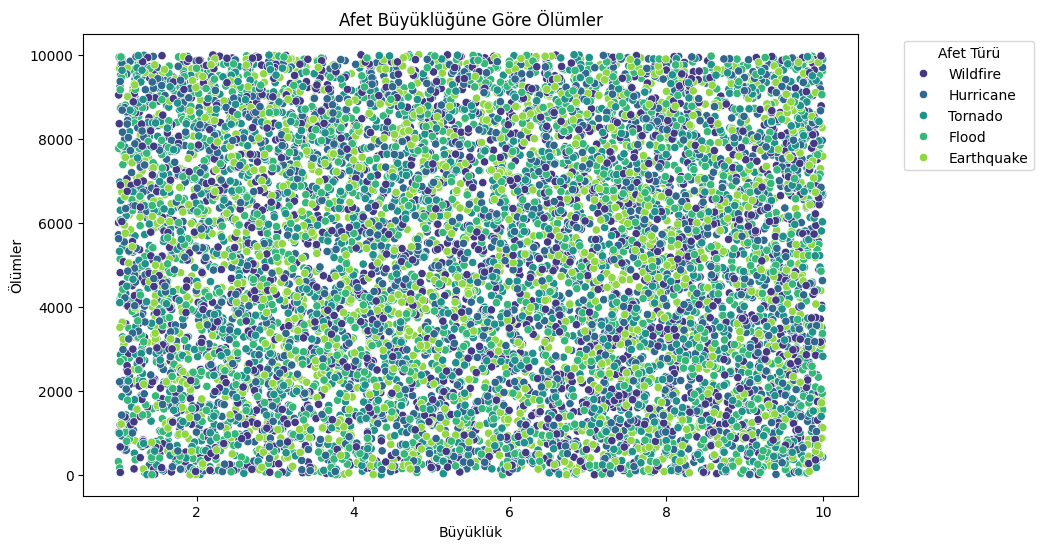

In [8]:
# 2. Afet Büyüklüğüne Göre Ölümler
print("\nAfet büyüklüğüne göre ölümlerin dağılımı:")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Magnitude", y="Fatalities", data=data, hue="Disaster_Type", palette="viridis")  # Dağılım grafiği oluşturuyoruz
plt.title("Afet Büyüklüğüne Göre Ölümler")
plt.xlabel("Büyüklük")
plt.ylabel("Ölümler")
plt.legend(title="Afet Türü", bbox_to_anchor=(1.05, 1), loc="upper left")  # Grafiğe açıklama ekliyoruz
plt.show()
# Açıklama: Bu grafik, afetlerin büyüklüğüne (Magnitude) göre ölümlerin (Fatalities) dağılımını bir noktalarla (scatter plot) gösteriyor.
# Afet türleri farklı renklerle ayırt ediliyor. Bu, afet büyüklüğü ile ölüm sayısı arasındaki ilişkiyi gözlemlemeye olanak tanır.



Tarihe göre afetlerin büyüklüğü:


<ipython-input-9-28d692910e0c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Date", y="Magnitude", data=data, ci=None)  # Zaman serisi çiziyoruz


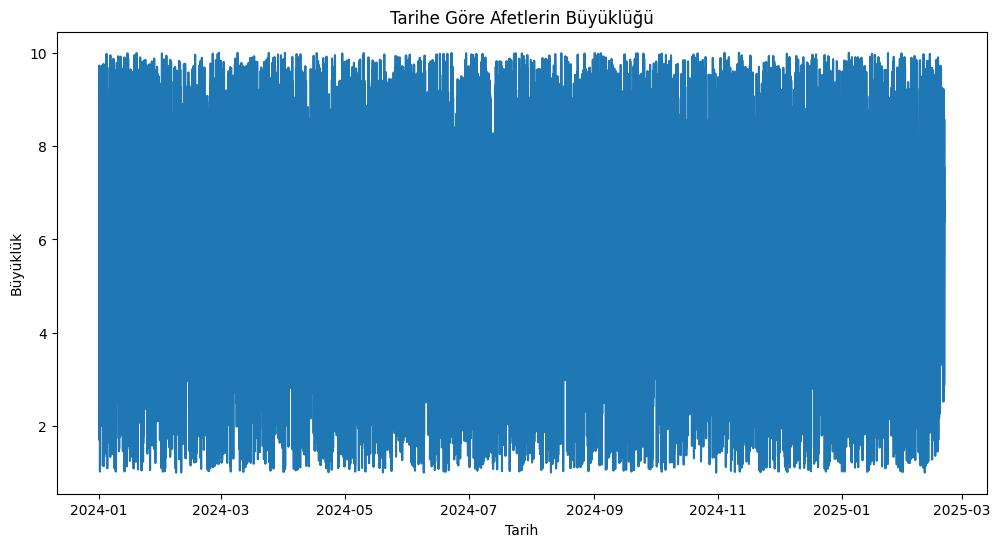

In [9]:
# 3. Tarihe Göre Afetlerin Büyüklüğü
print("\nTarihe göre afetlerin büyüklüğü:")
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d %H:%M:%S")  # Tarih sütununu datetime formatına çeviriyoruz
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="Magnitude", data=data, ci=None)  # Zaman serisi çiziyoruz
plt.title("Tarihe Göre Afetlerin Büyüklüğü")
plt.xlabel("Tarih")
plt.ylabel("Büyüklük")
plt.show()
# Açıklama: Bu grafik, afetlerin büyüklüğünü zamanla (Tarih) nasıl değiştiğini gösteren bir çizgi grafiğidir.
# Zaman içinde büyüklüklerin trendini inceleyerek afetlerin sıklığı ve şiddetindeki değişimleri gözlemleyebilirsiniz.

In [10]:
# 4. En Çok Ölüm Yaşanan Ülkeler  !!Sorgu
print("\nEn çok ölüm yaşanan ülkeler:")
fatalities_by_location = data.groupby("Location")["Fatalities"].sum().sort_values(ascending=False)  # Ülkelere göre ölümleri topluyoruz
print(fatalities_by_location.head(10))  # İlk 10 ülkeyi yazdırıyoruz
# Açıklama: Bu sorgu, her bir ülke için toplam ölüm sayısını hesaplar ve en fazla ölüm yaşanan 10 ülkeyi listeler.



En çok ölüm yaşanan ülkeler:
Location
Brazil       8807328
India        8335296
Indonesia    8329256
USA          8219768
Japan        8095554
China        8062087
Name: Fatalities, dtype: int64



En çok ölüm yaşanan ülkeler (Pasta Grafiği):


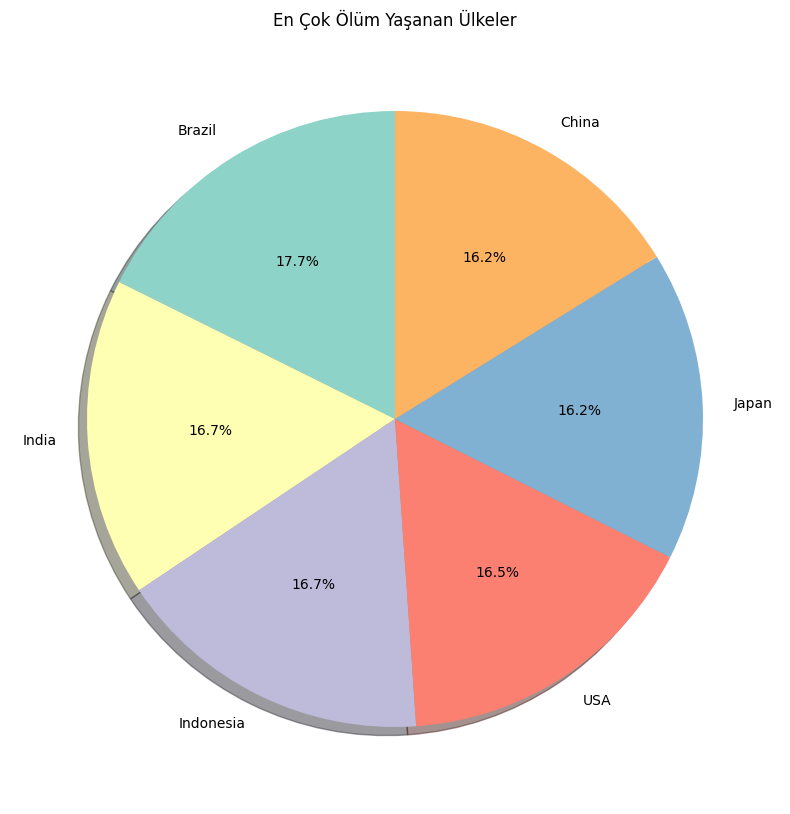

In [11]:
# Pasta grafiği ile en çok ölüm yaşanan ülkeler   !!Sorgu
print("\nEn çok ölüm yaşanan ülkeler (Pasta Grafiği):")
top_10_fatalities = fatalities_by_location.head(10)
plt.figure(figsize=(10, 10))
top_10_fatalities.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, colors=sns.color_palette("Set3"))
plt.title("En Çok Ölüm Yaşanan Ülkeler")
plt.ylabel('')
plt.show()
# Açıklama: Bu pasta grafiği, en fazla ölüm yaşanan 10 ülkeyi ve her birinin yüzdelik payını gösterir.
# Verilerin görselleştirilmesi, her bir ülkenin ölüm oranının daha kolay anlaşılmasını sağlar.


Ülkelere göre toplam ekonomik kayıplar (Yatay Çubuk Grafiği):


<ipython-input-12-1ab74e9de85b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=economic_loss_by_location.values, y=economic_loss_by_location.index[:10], palette="YlOrRd", orient='h')


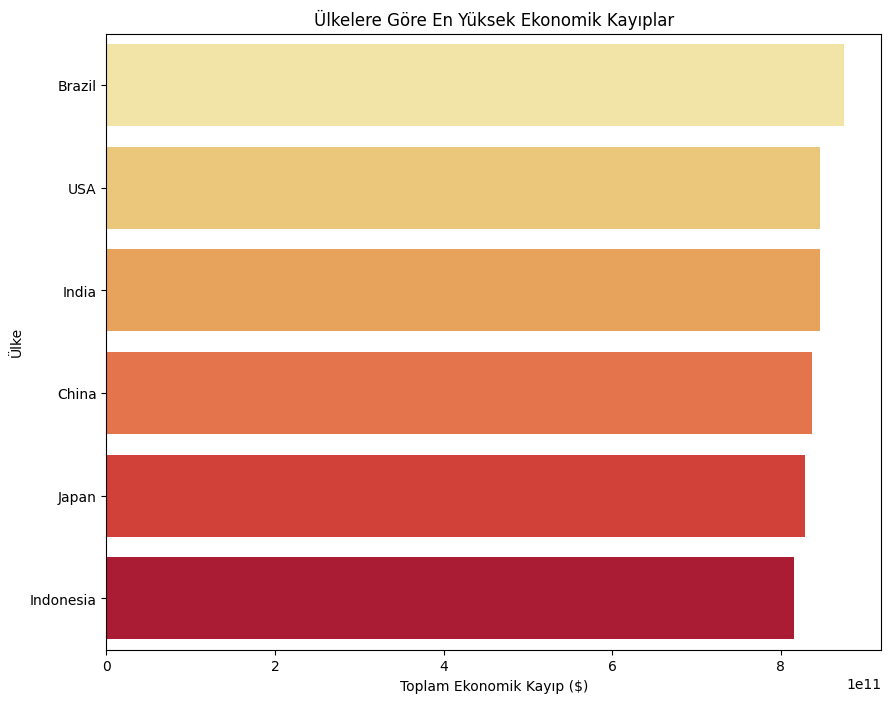

In [12]:
# 5. Ülkelere Göre Toplam Ekonomik Kayıplar (Yatay Çubuk Grafiği)  !!Sorgu
print("\nÜlkelere göre toplam ekonomik kayıplar (Yatay Çubuk Grafiği):")
economic_loss_by_location = data.groupby("Location")["Economic_Loss($)"].sum().sort_values(ascending=False)  # Ülkelere göre ekonomik kayıpları topluyoruz
plt.figure(figsize=(10, 8))
sns.barplot(x=economic_loss_by_location.values, y=economic_loss_by_location.index[:10], palette="YlOrRd", orient='h')
plt.title("Ülkelere Göre En Yüksek Ekonomik Kayıplar")
plt.xlabel("Toplam Ekonomik Kayıp ($)")
plt.ylabel("Ülke")
plt.show()
# Açıklama: Bu grafik, ülkelere göre toplam ekonomik kayıpları sıralar ve ilk 10 ülkeyi yatay çubuk grafiğiyle gösterir.
# Böylece hangi ülkelerin afetler sonucunda daha fazla ekonomik zarar gördüğü görsel olarak analiz edilir.


In [13]:
# 6. Her Afet Türü İçin Ortalama Ekonomik Kayıp  !!Sorgu
print("\nHer afet türü için ortalama ekonomik kayıp:")
mean_loss_by_disaster = data.groupby("Disaster_Type")["Economic_Loss($)"].mean()  # Afet türlerine göre ortalama kaybı hesaplıyoruz
print(mean_loss_by_disaster)
# Açıklama: Bu sorgu, her afet türü için ortalama ekonomik kaybı hesaplar ve her türdeki kaybın büyüklüğünü gösterir.



Her afet türü için ortalama ekonomik kayıp:
Disaster_Type
Earthquake    4.972542e+08
Flood         5.065814e+08
Hurricane     5.100738e+08
Tornado       5.071573e+08
Wildfire      5.040347e+08
Name: Economic_Loss($), dtype: float64


In [14]:
# 7. En Düşük Büyüklükteki 5 Afet !!Sorgu
print("\nEn düşük büyüklükteki 5 afet:")
lowest_magnitude_disasters = data.nsmallest(5, "Magnitude")  # En küçük büyüklükteki 5 afet
print(lowest_magnitude_disasters)
# Açıklama: Bu sorgu, büyüklük açısından en küçük 5 afetin verilerini çıkarır. Genellikle, küçük büyüklükteki afetler daha az hasar bırakabilir.



En düşük büyüklükteki 5 afet:
      Disaster_ID Disaster_Type Location  Magnitude                Date  \
910           911         Flood   Brazil   1.000656 2024-02-07 22:00:00   
7297         7298     Hurricane      USA   1.002744 2024-10-31 01:00:00   
3839         3840      Wildfire    China   1.003162 2024-06-08 23:00:00   
9764         9765     Hurricane    China   1.003700 2025-02-10 20:00:00   
5343         5344      Wildfire   Brazil   1.004596 2024-08-10 15:00:00   

      Fatalities  Economic_Loss($)  
910          311      5.219833e+08  
7297        5712      3.393611e+08  
3839        6003      3.508132e+08  
9764        5619      4.017609e+08  
5343        9041      5.714334e+08  



En düşük büyüklükteki afetlerin türlerinin dağılımı:


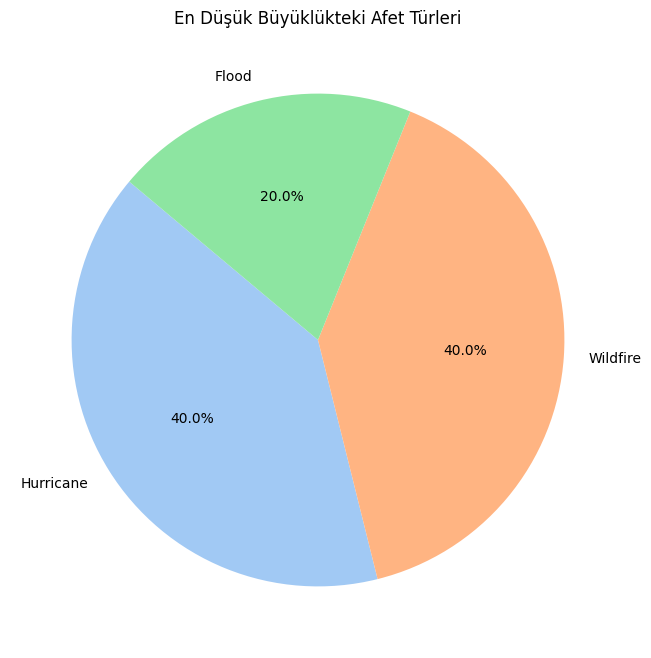

In [15]:
# En düşük büyüklükteki afet türlerinin dağılımı (Pasta Grafiği) !!Sorgu
print("\nEn düşük büyüklükteki afetlerin türlerinin dağılımı:")
plt.figure(figsize=(8, 8))
lowest_magnitude_disasters["Disaster_Type"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("En Düşük Büyüklükteki Afet Türleri")
plt.ylabel("")
plt.show()
# Açıklama: Bu pasta grafiği, en düşük büyüklükteki afet türlerinin dağılımını gösterir.
# Bu, küçük afetlerin hangi türde daha sık meydana geldiğini anlamamıza yardımcı olur.


Ölümlerle ekonomik kayıplar arasındaki ilişki:


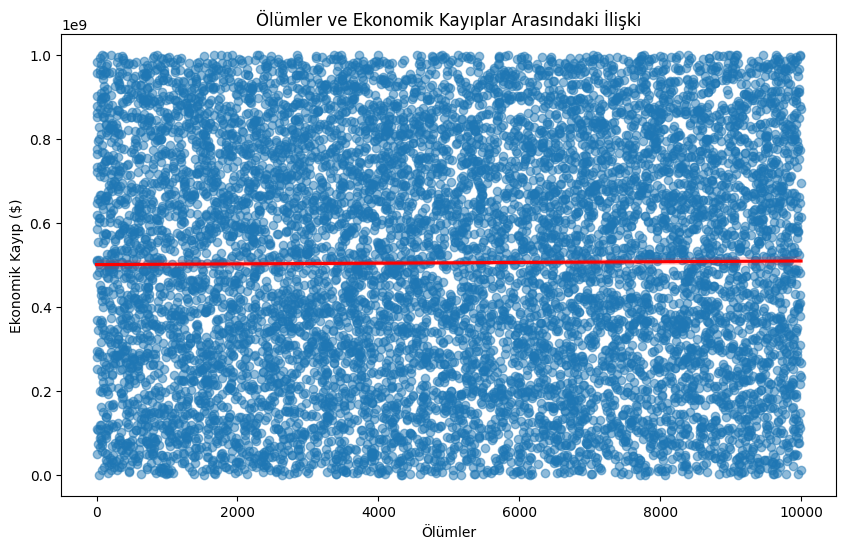

In [16]:
# 8. Ölümlerle Ekonomik Kayıplar Arasındaki İlişki !!Sorgu
print("\nÖlümlerle ekonomik kayıplar arasındaki ilişki:")
plt.figure(figsize=(10, 6))
sns.regplot(x="Fatalities", y="Economic_Loss($)", data=data, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})  # Regresyon çizgisi
plt.title("Ölümler ve Ekonomik Kayıplar Arasındaki İlişki")
plt.xlabel("Ölümler")
plt.ylabel("Ekonomik Kayıp ($)")
plt.show()
# Açıklama: Bu grafik, ölümlerle ekonomik kayıplar arasındaki ilişkiyi incelemek için bir regresyon grafiği sunar.
# Grafik, ölümler arttıkça ekonomik kayıpların nasıl değiştiğini görsel olarak ortaya koyar.


Afet büyüklüklerinin dağılımı (Histogram):


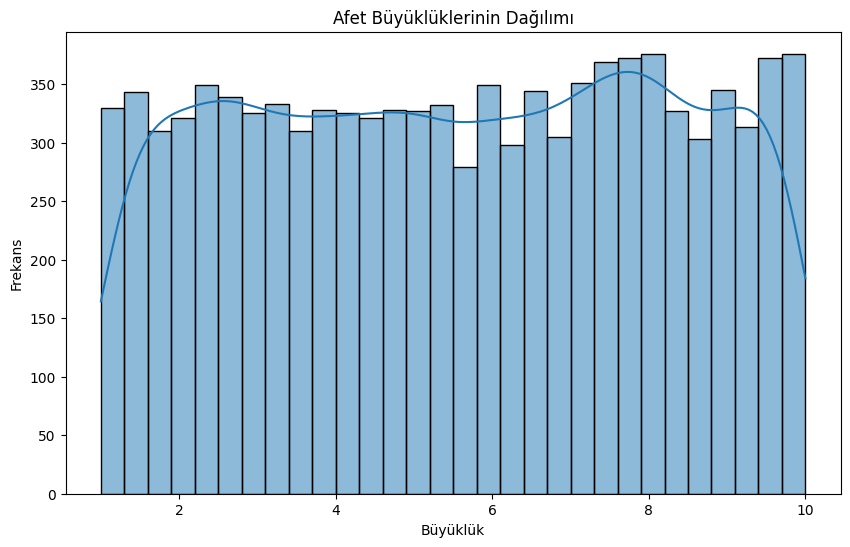

In [17]:
# 9. Afet Büyüklüklerinin Dağılımı (Histogram) !!Sorgu
print("\nAfet büyüklüklerinin dağılımı (Histogram):")
plt.figure(figsize=(10, 6))
sns.histplot(data['Magnitude'], kde=True, bins=30)  # Histogram ve kernel yoğunluk tahmini
plt.title("Afet Büyüklüklerinin Dağılımı")
plt.xlabel("Büyüklük")
plt.ylabel("Frekans")
plt.show()
# Açıklama: Bu histogram, afet büyüklüklerinin dağılımını gösterir.
# Kernel yoğunluk tahmini (KDE) ile büyüklüklerin nasıl yayılış gösterdiğini ve hangi büyüklüklerin daha sık meydana geldiğini inceleyebiliriz.



Afet türlerine göre ekonomik kayıp (Box Plot):


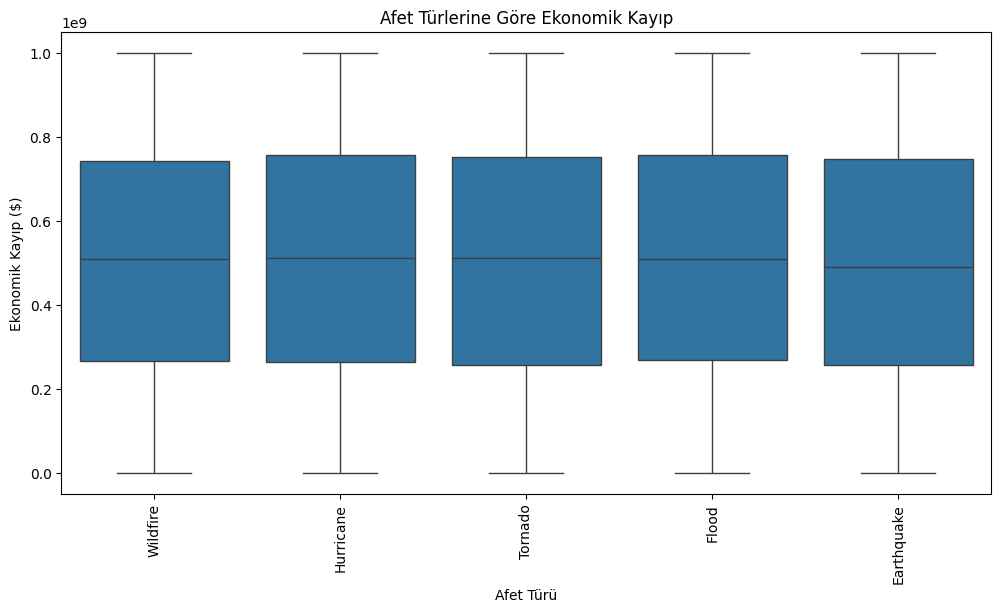

In [18]:
# 10. Afet Türlerine Göre Ekonomik Kayıp (Box Plot)  !!Sorgu
print("\nAfet türlerine göre ekonomik kayıp (Box Plot):")
plt.figure(figsize=(12, 6))
sns.boxplot(x='Disaster_Type', y='Economic_Loss($)', data=data)  # Box plot ile dağılımı gösteriyoruz
plt.title("Afet Türlerine Göre Ekonomik Kayıp")
plt.xlabel("Afet Türü")
plt.ylabel("Ekonomik Kayıp ($)")
plt.xticks(rotation=90)  # X eksenindeki etiketleri döndürüyoruz
plt.show()
# Açıklama: Bu box plot, afet türlerine göre ekonomik kayıpların dağılımını ve uç değerlerini gösterir.
# Ekonomik kayıpların hangi afet türlerinde daha fazla ya da daha az olduğunu görselleştirir.



Ay bazında afet sayısı:


<ipython-input-19-bdf76d5cfe2b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_disaster_count.index, y=monthly_disaster_count.values, palette="coolwarm")


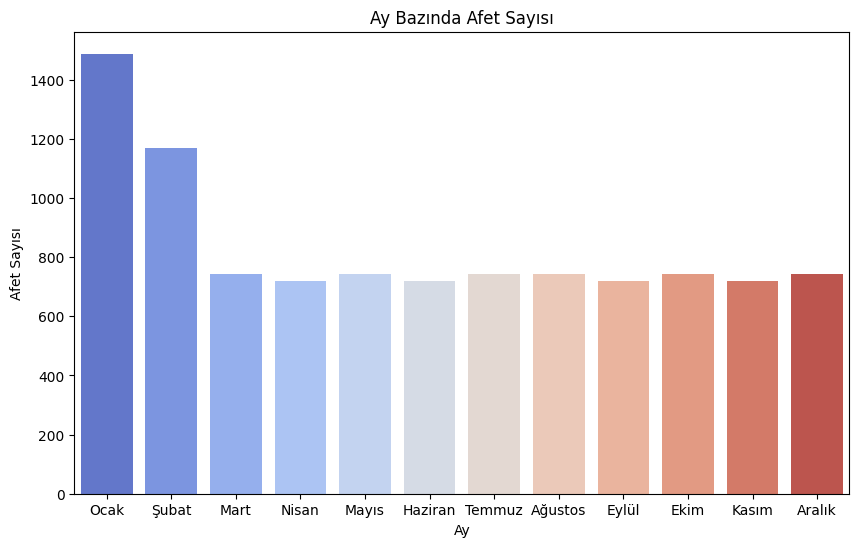

In [19]:
# 11. Ay Bazında Afet Sayısı  !!Sorgu
print("\nAy bazında afet sayısı:")
data['Month'] = data['Date'].dt.month  # Tarihten ay bilgisini çıkarıyoruz
monthly_disaster_count = data['Month'].value_counts().sort_index()  # Ay bazında afet sayısını hesaplıyoruz
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_disaster_count.index, y=monthly_disaster_count.values, palette="coolwarm")
plt.title("Ay Bazında Afet Sayısı")
plt.xlabel("Ay")
plt.ylabel("Afet Sayısı")
plt.xticks(ticks=range(12), labels=['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık'])
plt.show()
# Açıklama: Bu grafik, her ay için afet sayısını gösteren bir çubuk grafiğidir.
# Aylar arasındaki afet sıklığını kıyaslayarak hangi aylarda daha fazla afet yaşandığını gözlemleyebilirsiniz.
